In [1]:
# !pip3 install retentioneering==2.0.0

In [2]:
import pandas as pd
import retentioneering
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('systema_feb_mar.csv')
df = data[['user_id', 'event_type', 'client_event_time']]
df.columns = ['user_id', 'event', 'timestamp']

retentioneering.config.update({
    'user_col': 'user_id',
    'event_col':'event',
    'event_time_col':'timestamp',
})

In [3]:
vec = df.rete.extract_features(feature_type='count',
                                 ngram_range=(1, 1))

## Размеры кластеров

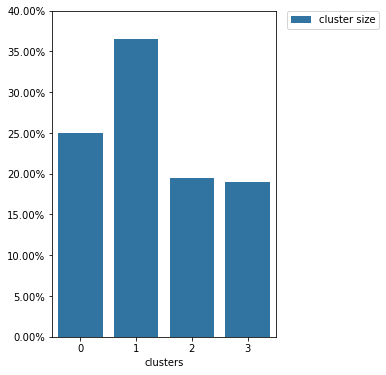

In [4]:
df.rete.get_clusters(method='kmeans',
                       feature_type='tfidf',
                       n_clusters=4,
                       ngram_range=(1,2),
                       plot_type='cluster_bar');

In [5]:
clus_0 = df.rete.filter_cluster(0)
clus_1 = df.rete.filter_cluster(1)
clus_2 = df.rete.filter_cluster(2)
clus_3 = df.rete.filter_cluster(3)

clusters = [clus_0, clus_1, clus_2, clus_3]

len(clus_0), len(clus_1), len(clus_2), len(clus_3)

(67787, 16097, 2577, 33726)

In [6]:
clus_0

,user_id,event,timestamp
0,67e2142cb788f52326b4c8d62984b85fa26c8a2c,menu: application_start,2023-02-07 04:50:06.505
1,67e2142cb788f52326b4c8d62984b85fa26c8a2c,new_year: snow_disable,2023-02-07 04:50:06.982
2,67e2142cb788f52326b4c8d62984b85fa26c8a2c,menu: sign_in,2023-02-07 04:50:09.771
3,67e2142cb788f52326b4c8d62984b85fa26c8a2c,menu: library_open,2023-02-07 04:50:12.084
4,67e2142cb788f52326b4c8d62984b85fa26c8a2c,lecture: switch_chapter,2023-02-07 04:50:14.746
...,...,...,...
67782,8e008684e90d104aed59e92018404426,lecture: switch_paragraph,2023-03-06 21:40:24.662
67783,8e008684e90d104aed59e92018404426,lecture: actor_change,2023-03-06 21:40:27.841
67784,8e008684e90d104aed59e92018404426,lecture: fps,2023-03-06 21:41:22.465
67785,8e008684e90d104aed59e92018404426,lecture: fps,2023-03-06 21:42:22.453


In [7]:
result = df.rete.get_clusters(method='kmeans',
                       feature_type='tfidf',
                       n_clusters=4,
                       ngram_range=(1,2))

In [8]:
df.rete.cluster_mapping

{0: ['0046b2ec7823d017b19e14b04baa3721',
  '004E8A00-C0CA-4EEE-BB72-AD4076D5B32C',
  '0050CF52-74D9-439B-B80D-29AA114D748C',
  '0081567bb64a31d8596e5dfd92ba0e9f',
  '00F567A1-C536-47EF-AC60-6798D30F74B4',
  '01fcd97b67feb1d4224d733ddf2744cf16f309ab',
  '02e80d3ce9e065d76cf31f177958f3ec',
  '030ada15283e34f5b67de5b6efeb1c86',
  '0313d321fd6d9862012c14c85697bbb6f1eaa943',
  '0486482C-C53A-4FAA-92E4-55A57968AD0D',
  '050AA50A-3CE5-47E2-BFBD-0C9D7AA9F28F',
  '0551c6bc42330edbb5f99cf216ecdb87',
  '05e599573c8d103baa629fcadf9461ce269dfe4d',
  '05edb71895c9878d842fc208b957f09252d3590f',
  '06F601B1-D60F-49B7-959B-2A459C8DAD02',
  '078a6e552407f0af5accc91e706e8e75',
  '084D7334-9233-471E-AEE1-D7E712EFEBEC',
  '0862C4EE-DCEE-47E4-84C8-7A6CB29E8F71',
  '0881B544-8F8E-4F50-AB20-D09B8B1CB541',
  '08abc9c69fa89bcff5e4fe0b1aea0ffd',
  '08fa2c4095aa2c2dbaa9d836a0c25365',
  '0989a9a5eb38dfa43912454445313ecd19f2c431',
  '09CB37A4-4DB4-4AEC-8CFA-23D108264E05',
  '0B627AC3-C52D-4A1C-81A8-71BF40E683E6',
 

# -- Библиотека для построение scatter plot --

In [9]:
import json
from datetime import datetime
import matplotlib.pyplot as plt

import seaborn as sns
from functools import wraps
from IPython.display import IFrame, display, HTML


def __save_plot__(func):
    @wraps(func)
    def save_plot_wrapper(*args, **kwargs):
        sns.mpl.pyplot.show()
        sns.mpl.pyplot.close()
        res = func(*args, **kwargs)
        if len(res) == 2:
            (vis_object, name), res, cfg = res, None, None
        elif len(res) == 3:
            (vis_object, name, res), cfg = res, None
        else:
            vis_object, name, res, cfg = res
        idx = 'id: ' + str(int(datetime.now().timestamp()))
        coords = vis_object.axis()

        vis_object.get_figure().savefig(name, bbox_inches="tight", dpi=cfg.get('save_dpi') or 200)
        return res

    return save_plot_wrapper


class ___FigureWrapper__(object):
    def __init__(self, fig):
        self.fig = fig

    def get_figure(self):
        return self.fig

    def axis(self):
        if len(self.fig.axes) > 1:
            x = self.fig.axes[1].axis()
        else:
            x = self.fig.axes[0].axis()
        return (x[0] / 64, x[0] + (x[1] - x[0]) / 50, x[2] / 1.5, x[3] / 1.5)

    def text(self, *args, **kwargs):
        self.fig.text(*args, **kwargs)


class ___DynamicFigureWrapper__(object):
    def __init__(self, fig, interactive, width, height, links):
        self.fig = fig
        self.interactive, self.width, self.height = interactive, width, height
        self.links = links

    def get_figure(self):
        savefig = __SaveFigWrapper__(self.fig, self.interactive, self.width, self.height)
        return savefig

    def text(self, x, y, text, *args, **kwargs):
        # parts = self.fig.split('<main>')
        # res = parts[:1] + [f'<p>{text}</p>'] + parts[1:]
        # self.fig = '\n'.join(res)
        pass

    def get_raw(self, path):
        base = '.'.join(path.split('.')[:-1])
        with open(base + '_config.json', 'w', encoding="utf-8") as f:
            json.dump(self.links, f)
        return base + '_config.json'

    @staticmethod
    def axis():
        return 4 * [0]


class __SaveFigWrapper__(object):
    def __init__(self, data, interactive=True, width=1000, height=700):
        self.data = data
        self.interactive = interactive
        self.width = width
        self.height = height

    def savefig(self, name, **kwargs):
        with open(name, 'w', encoding="utf-8") as f:
            f.write(self.data)
        if self.interactive:
            display(IFrame(name, width=self.width + 200, height=self.height + 200))

In [10]:
from datetime import datetime

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pylab as plt


_ = pd.DataFrame()


@__save_plot__
def plot_projection(*,
                    projection,
                    targets,
                    legend_title):
    rcParams['figure.figsize'] = 8, 6

    scatter = sns.scatterplot(x=projection[:, 0],
                              y=projection[:, 1],
                              hue=targets,
                              legend='full',
                              palette=sns.color_palette("bright")[0:np.unique(targets).shape[0]])

    # move legend outside the box
    scatter.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.).set_title(legend_title)
    plt.setp(scatter.get_legend().get_title(), fontsize='12')

    plot_name = 'project_{}'.format(datetime.now()).replace(':', '_').replace('.', '_') + '.svg'
    plot_name = _.rete.retention_config['experiments_folder'] + '/' + plot_name

    return scatter, plot_name, projection, _.rete.retention_config

In [11]:
import pandas as pd
import numpy as np
import umap.umap_ as umap
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


_embedding_types = {'tfidf', 'count', 'binary', 'frequency', 'time', 'time_fraction'}


def extract_features(self, *,
                     feature_type='tfidf',
                     ngram_range=(1, 1)):
    """
    User trajectories vectorizer.

    Parameters
    ----------
    feature_type: str, (optional, default 'tfidf')
        Type of vectorizer. Available vectorization methods:
        {'tfidf', 'count', 'binary', 'frequency'}

    ngram_range: tuple, (optional, default (1,1))
        The lower and upper boundary of the range of n-values for different
        word n-grams or char n-grams to be extracted. For example
        ngram_range=(1, 1) means only single events, (1, 2) means single events
        and bigrams.

    Returns
    -------
    Encoded user trajectories

    Return type
    -----------
    pd.DataFrame of (number of users, number of unique events | event n-grams)
    """
    if feature_type not in _embedding_types:
        raise ValueError("Unknown feature type: {}.\nPlease choose one from: {}".format(
            feature_type,
            ', '.join(_embedding_types)
        ))

    index_col = self.retention_config['user_col']
    event_col = self.retention_config['event_col']
    time_col = self.retention_config['event_time_col']
    tmp = self._obj.copy()

    res = _embedder(tmp, index_col, event_col, time_col,
                    feature_type=feature_type,
                    ngram_range=ngram_range)

    return res


def _embedder(data, index_col, event_col, time_col, *,
              feature_type,
              ngram_range=(1, 1)):
    """
    Similar to ``frequency_embedder()``, but normalizes event frequencies with inversed document frequency.

    Parameters
    --------
    data: pd.DataFrame
        Clickstream dataset.
    ngram_range: tuple, optional
        Range of ngrams to use in feature extraction. Default: ``(1, 1)``
    index_col: str, optional
        Name of custom index column, for more information refer to ``init_config``. For instance, if in config you have defined ``index_col`` as ``user_id``, but want to use function over sessions. By default the column defined in ``init_config`` will be used as ``index_col``.
    event_col: str, optional
        Name of custom event column, for more information refer to ``init_config``. For instance, you may want to aggregate some events or rename and use it as new event column. By default the column defined in ``init_config`` will be used as ``event_col``.

    Returns
    --------
    Dataframe with ``index_col`` vectorized by TF-IDF of events.

    Return type
    -------
    pd.DataFrame
    """
    corpus = data.groupby(index_col)[event_col].apply(
        lambda x: '~~'.join([el.lower() for el in x])
    )

    if feature_type in {'count', 'frequency', 'tfidf', 'binary'}:
        if feature_type == 'tfidf':
            vectorizer = TfidfVectorizer(ngram_range=ngram_range, token_pattern = '[^~]+').fit(corpus)
        elif feature_type in {'count', 'frequency'}:
            vectorizer = CountVectorizer(ngram_range=ngram_range, token_pattern='[^~]+').fit(corpus)
        elif feature_type == 'binary':
            vectorizer = CountVectorizer(ngram_range=ngram_range, token_pattern='[^~]+', binary=True).fit(corpus)

        cols = [dict_key[0] for dict_key in sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1])]
        vec_data = pd.DataFrame(index=sorted(data[index_col].unique()),
                                columns=cols,
                                data=vectorizer.transform(corpus).todense())
        vec_data.index.rename(index_col, inplace=True)

    # normalize if frequency:
    if feature_type == 'frequency':
        vec_data = vec_data.div(vec_data.sum(axis=1), axis=0).fillna(0)

    # compute time features
    if feature_type in {'time', 'time_fraction'}:
        df = data.copy()
        df[time_col] = pd.to_datetime(df[time_col])
        df.sort_values(by=[index_col, time_col], inplace=True)
        df.reset_index(inplace=True)
        df['time_diff'] = df.groupby(index_col)[time_col].diff().dt.total_seconds()
        df['time_length'] = df['time_diff'].shift(-1)
        if feature_type == 'time_fraction':
            vec_data = df.groupby([index_col])\
                        .apply(lambda x: x.groupby(event_col)['time_length'].sum()/x['time_length'].sum())\
                        .unstack(fill_value=0)
        elif feature_type == 'time':
            vec_data = df.groupby([index_col])\
                        .apply(lambda x: x.groupby(event_col)['time_length'].sum())\
                        .unstack(fill_value=0)

    # rename columns to add feature information
    vec_data.columns = [col + '_' + feature_type for col in vec_data.columns]

    setattr(vec_data.rete, 'datatype', 'features')
    return vec_data


def _learn_tsne(data, **kwargs):
    """
    Calculates TSNE transformation for given matrix features.

    Parameters
    --------
    data: np.array
        Array of features.
    kwargs: optional
        Parameters for ``sklearn.manifold.TSNE()``

    Returns
    -------
    Calculated TSNE transform

    Return type
    -------
    np.ndarray
    """

    TSNE_PARAMS = ['angle', 'early_exaggeration', 'init', 'learning_rate', 'method', 'metric',
            'min_grad_norm', 'n_components', 'n_iter', 'n_iter_without_progress', 'n_jobs',
            'perplexity', 'verbose']

    kwargs = {k: v for k, v in kwargs.items() if k in TSNE_PARAMS}
    res = TSNE(random_state=0, **kwargs).fit_transform(data.values)
    return pd.DataFrame(res, index=data.index.values)


def _learn_umap(data, **kwargs):
    """
    Calculates UMAP transformation for given matrix features.

    Parameters
    --------
    data: np.array
        Array of features.
    kwargs: optional
        Parameters for ``umap.UMAP()``

    Returns
    -------
    Calculated UMAP transform

    Return type
    -------
    np.ndarray
    """
    reducer = umap.UMAP()
    _umap_filter = reducer.get_params()
    kwargs = {k: v for k, v in kwargs.items() if k in _umap_filter}
    embedding = umap.UMAP(random_state=0, **kwargs).fit_transform(data.values)
    return pd.DataFrame(embedding, index=data.index.values)

In [12]:
import pandas as pd

def project(self, *,
            method='tsne',
            targets=(),
            ngram_range=(1,1),
            feature_type='tfidf',
            plot_type=None,
            **kwargs):
    """
    Does dimention reduction of user trajectories and draws projection plane.

    Parameters
    ----------
    method: {'umap', 'tsne'} (optional, default 'tsne')
        Type of manifold transformation.
    plot_type: {'targets', 'clusters', None} (optional, default None)
        Type of color-coding used for projection visualization:
            - 'clusters': colors trajectories with different colors depending on cluster number.
            IMPORTANT: must do .rete.get_clusters() before to obtain cluster mapping.
            - 'targets': color trajectories based on reach to any event provided in 'targets' parameter.
            Must provide 'targets' parameter in this case.
        If None, then only calculates TSNE without visualization.

    targets: list or tuple of str (optional, default  ())
        Vector of event_names as str. If user reach any of the specified events, the dot corresponding
        to this user will be highlighted as converted on the resulting projection plot

    feature_type: str, (optional, default 'tfidf')
        Type of vectorizer to use before dimension-reduction. Available vectorization methods:
        {'tfidf', 'count', 'binary', 'frequency'}

    ngram_range: tuple, (optional, default (1,1))
        The lower and upper boundary of the range of n-values for different
        word n-grams or char n-grams to be extracted before dimension-reduction.
        For example ngram_range=(1, 1) means only single events, (1, 2) means single events
        and bigrams.

    Returns
    --------
    Dataframe with data in the low-dimensional space for user trajectories indexed by user IDs.

    Return type
    --------
    pd.DataFrame
    """
    event_col = self.retention_config['event_col']
    index_col = self.retention_config['user_col']

    if plot_type == 'clusters':
        if hasattr(self, 'clusters'):
            targets_mapping = self.clusters
            legend_title = 'cluster number:'
        else:
            raise AttributeError("Run .rete.get_clusters() before using plot_type='clusters' to obtain clusters mapping")

    elif plot_type == 'targets':
        if targets is None:
            raise ValueError("When plot_type ='targets' must provide parameter targets as list of target event names")
        else:
            targets = [list(pd.core.common.flatten(targets))]
            legend_title = 'conversion to (' + ' | '.join(targets[0]).strip(' | ') + '):'
            targets_mapping = (self._obj
                                     .groupby(index_col)[event_col]
                                     .apply(lambda x: bool(set(*targets) & set(x)))
                                     .to_frame()
                                     .sort_index()[event_col]
                                     .values)

    features = self.extract_features(feature_type=feature_type,
                                     ngram_range=ngram_range)

    if method == 'tsne':
        self._projection = _learn_tsne(features, **kwargs)
    elif method == 'umap':
        self._projection = _learn_umap(features, **kwargs)

    # return only embeddings is no plot_type:
    if plot_type is None:
        return self._projection

    plot_projection(
        projection=self._projection.values,
        targets=targets_mapping,
        legend_title=legend_title,
    )

    return self._projection

# -- Библиотека для построение scatter plot --

## Количество событий в каждом кластере

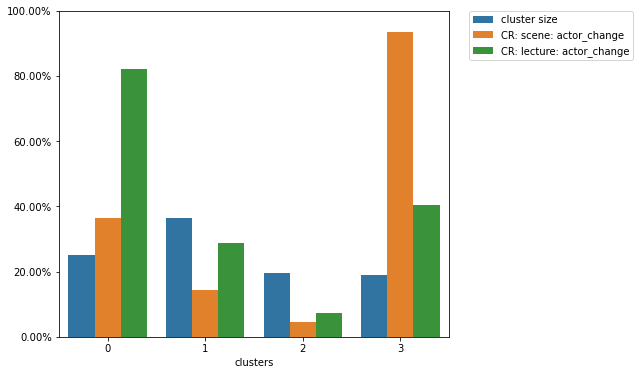

In [82]:
df.rete.get_clusters(method='kmeans',
                       feature_type='tfidf',
                       n_clusters=4,
                       ngram_range=(1,2),
                       plot_type='cluster_bar',
                       targets=['scene: actor_change', 'lecture: actor_change']);

## Статистика по кластерам

Сколько в кластерах ивентов из общего кол-ва:

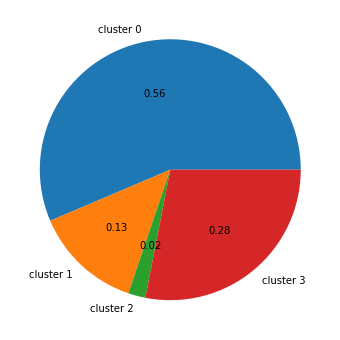

In [14]:
events_in_clusters = [len(clus_0)/len(df), len(clus_1)/len(df), len(clus_2)/len(df), len(clus_3)/len(df)]
labels = ["cluster 0", "cluster 1", "cluster 2", "cluster 3"]

def absolute_value(val): # функция для отображения значений users_in_clusters на pie chart
    a  = np.round(val/100.*sum(events_in_clusters), 2)
    return a

plt.pie(events_in_clusters, labels = labels, autopct=absolute_value)

plt.show() 

Сколько в кластерах юзеров из общего кол-ва:

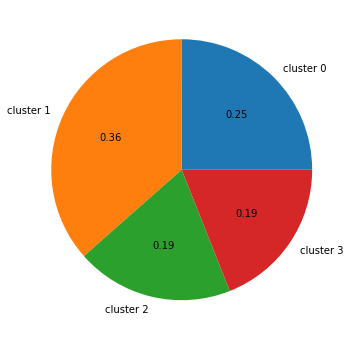

In [15]:
users_in_clusters = [len(set(clus_0.user_id))/len(set(df.user_id)), len(set(clus_1.user_id))/len(set(df.user_id)),
                    len(set(clus_2.user_id))/len(set(df.user_id)), len(set(clus_3.user_id))/len(set(df.user_id))]
labels = ["cluster 0", "cluster 1", "cluster 2", "cluster 3"]

import matplotlib.pyplot as plt
import numpy as np

def absolute_value(val): # функция для отображения значений users_in_clusters на pie chart
    a  = np.round(val/100.*sum(users_in_clusters), 2)
    return a

plt.pie(users_in_clusters, labels = labels, autopct=absolute_value)

plt.show() 

## Отличия сессий в кластерах

In [78]:
session_count_for_all_users = {}
avg_length = {}

for i, c in enumerate(clusters):

    cluster_session_count = []
    cluster_avg_length = []

    for user in set(c.user_id):
        df_user = data[data.user_id==user]
        
        user_session_count = len(set(df_user.session_id))
        cluster_session_count.append(user_session_count)

        avg_session_length = len(df_user)/user_session_count
        cluster_avg_length.append(avg_session_length)
        
    session_count_for_all_users[i] = cluster_session_count
    avg_length[i] = cluster_avg_length

In [112]:
for i in session_count_for_all_users.keys():
    print('Кластер', i)
    print('--Средние значения--')
    print('Кол-во сессий на пользователя: ', round(np.mean(session_count_for_all_users[i]), 2), 
          '\nСредняя длительности сессии', round(np.mean(avg_length[i]),2))
    print('--Медианные значения--')
    print(f'Кол-во юзеров: {len(set(clusters[i].user_id))}')
    print('Кол-во сессий: ', np.median(session_count_for_all_users[i]), 
          '\nСредняя длительности сессии', np.median(avg_length[i]))
    print(f'Кол-во сессий всего: {sum(session_count_for_all_users[i])}')
    print(f'Кол-во событий всего: {len(clusters[i])}')
    print(f'Среднее кол-во событий в сессии: {round(len(clusters[i]) / sum(session_count_for_all_users[i]),1)}\n')

Кластер 0
--Средние значения--
Кол-во сессий на пользователя:  1.86 
Средняя длительности сессии 74.9
--Медианные значения--
Кол-во юзеров: 502
Кол-во сессий:  1.0 
Средняя длительности сессии 37.55
Кол-во сессий всего: 933
Кол-во событий всего: 67787
Среднее кол-во событий в сессии: 72.7

Кластер 1
--Средние значения--
Кол-во сессий на пользователя:  1.48 
Средняя длительности сессии 14.77
--Медианные значения--
Кол-во юзеров: 732
Кол-во сессий:  1.0 
Средняя длительности сессии 11.0
Кол-во сессий всего: 1085
Кол-во событий всего: 16097
Среднее кол-во событий в сессии: 14.8

Кластер 2
--Средние значения--
Кол-во сессий на пользователя:  1.35 
Средняя длительности сессии 4.81
--Медианные значения--
Кол-во юзеров: 391
Кол-во сессий:  1.0 
Средняя длительности сессии 4.0
Кол-во сессий всего: 527
Кол-во событий всего: 2577
Среднее кол-во событий в сессии: 4.9

Кластер 3
--Средние значения--
Кол-во сессий на пользователя:  1.64 
Средняя длительности сессии 58.77
--Медианные значения--
Кол-

In [111]:
clus_0

,user_id,event,timestamp
0,67e2142cb788f52326b4c8d62984b85fa26c8a2c,menu: application_start,2023-02-07 04:50:06.505
1,67e2142cb788f52326b4c8d62984b85fa26c8a2c,new_year: snow_disable,2023-02-07 04:50:06.982
2,67e2142cb788f52326b4c8d62984b85fa26c8a2c,menu: sign_in,2023-02-07 04:50:09.771
3,67e2142cb788f52326b4c8d62984b85fa26c8a2c,menu: library_open,2023-02-07 04:50:12.084
4,67e2142cb788f52326b4c8d62984b85fa26c8a2c,lecture: switch_chapter,2023-02-07 04:50:14.746
...,...,...,...
67782,8e008684e90d104aed59e92018404426,lecture: switch_paragraph,2023-03-06 21:40:24.662
67783,8e008684e90d104aed59e92018404426,lecture: actor_change,2023-03-06 21:40:27.841
67784,8e008684e90d104aed59e92018404426,lecture: fps,2023-03-06 21:41:22.465
67785,8e008684e90d104aed59e92018404426,lecture: fps,2023-03-06 21:42:22.453


In [ ]:
session_count_for_all_users

In [79]:
session_count_for_all_users


{0: [1,
  1,
  1,
  1,
  1,
  1,
  2,
  5,
  1,
  12,
  2,
  2,
  1,
  4,
  1,
  2,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  1,
  2,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  3,
  1,
  1,
  1,
  5,
  2,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  3,
  1,
  2,
  3,
  2,
  1,
  1,
  3,
  1,
  1,
  3,
  1,
  1,
  1,
  2,
  2,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  2,
  1,
  1,
  3,
  6,
  1,
  2,
  1,
  1,
  1,
  1,
  5,
  1,
  1,
  2,
  1,
  1,
  2,
  1,
  1,
  1,
  4,
  1,
  1,
  3,
  1,
  1,
  1,
  1,
  2,
  1,
  1,
  3,
  3,
  1,
  1,
  2,
  1,
  1,
  3,
  2,
  2,
  3,
  3,
  1,
  6,
  5,
  3,
  1,
  2,
  2,
  1,
  2,
  2,
  1,
  2,
  6,
  1,
  1,
  2,
  2,
  2,
  1,
  3,
  1,
  2,
  1,
  3,
  1,
  2,
  2,
  1,
  2,
  1,
  4,
  1,
  1,
  1,
  2,
  1,
  2,
  2,
  1,
  2,
  1,
  1,
  1,
  3,
  2,
  2,
  5,
  1,
  1,
  3,
  1,
  1,
  1,
  3,
  1,
  17,
  2,
  1,
  1,
  1,
  4,
  1,
  1,
  2,
  3,
  1,
  1,
  1,
  2,
  1,


## User Flow кластера

In [161]:
# определение thresh
clus = clus_2
thresh_percent = 0.1
thresh = round(thresh_percent*len(set(clus.user_id)),0)

print(f'Сколько абстрактных юзеров потеряем, если поставим thresh={thresh}: {len(set(clus.user_id))*thresh_percent}')
print(f'Всего юзеров в кластере: {len(set(clus.user_id))}')
len(clus)/len(df)

Сколько абстрактных юзеров потеряем, если поставим thresh=39.0: 39.1
Всего юзеров в кластере: 391


0.02144158686047576

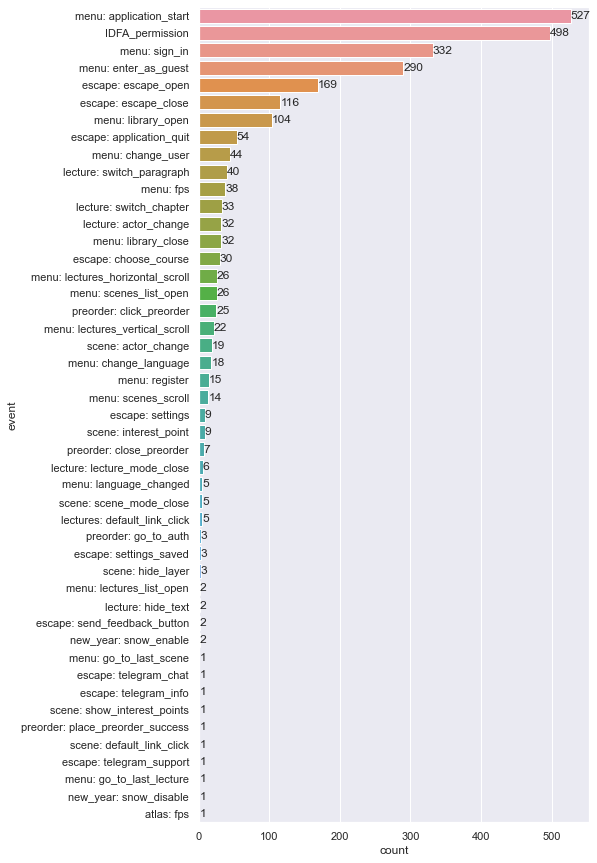

In [162]:
fig, ax = plt.subplots() 
plt.rcParams["figure.figsize"] = (7,15)

c = Counter(clus.event)
sorted_counter = [(l,k) for k,l in sorted([(j,i) for i,j in c.items()])]
sorted_counter_df = pd.DataFrame(sorted_counter)
sorted_counter_df.columns = ['event', 'count']

ax = sns.countplot(y="event",
              data = clus,
              order = clus['event'].value_counts().index)

ax.bar_label(ax.containers[0])
plt.show()

In [115]:
clus.rete.plot_graph(norm_type=None,
                     thresh=thresh,
                     weight_col='user_id',
                     targets = {'escape: application_quit':'red',
                                  'menu: application_start':'green'})

'experiments/graph_2023-03-21 12_21_39_040747.html'

## Сравнение кластеров

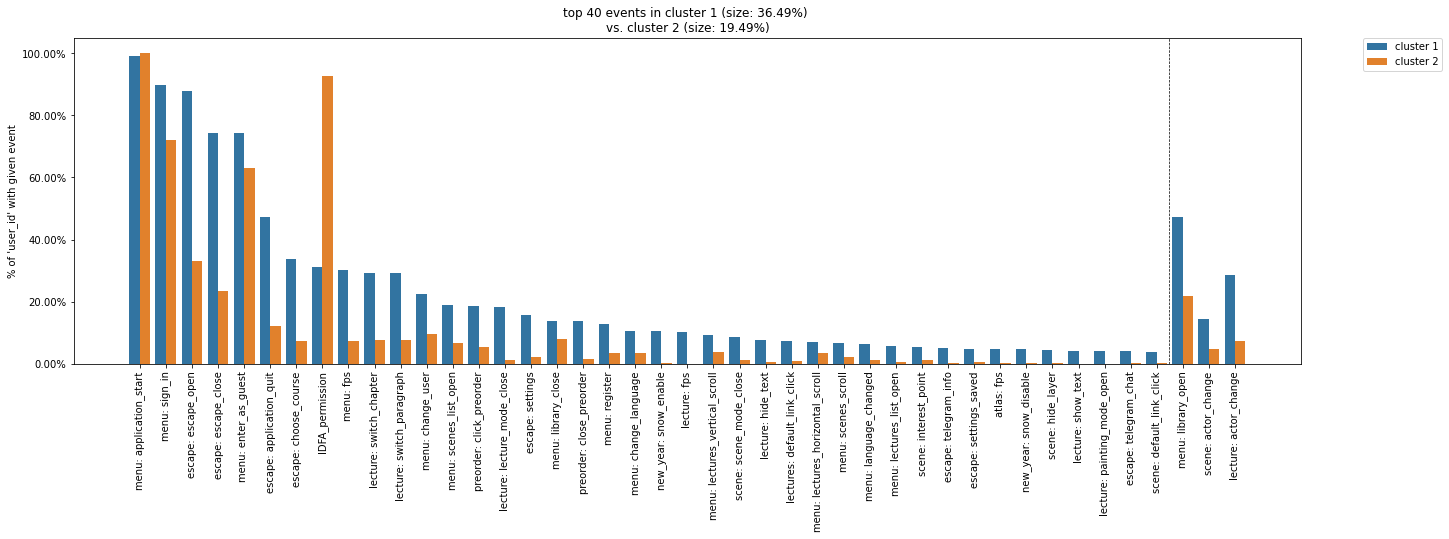

In [20]:
df.rete.cluster_event_dist(1, 2, top_n=40,
                             weight_col='user_id',
                             targets=['menu: library_open','scene: actor_change','lecture: actor_change'])

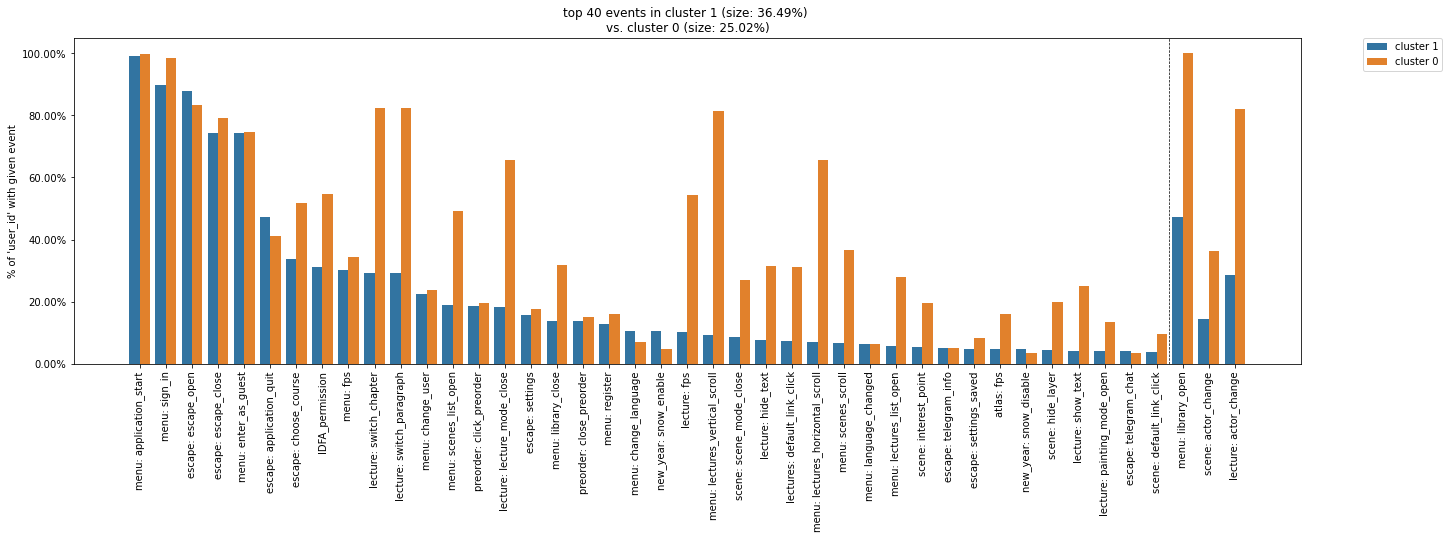

In [21]:
df.rete.cluster_event_dist(1, 0, top_n=40,
                             weight_col='user_id',
                             targets=['menu: library_open','scene: actor_change','lecture: actor_change'])

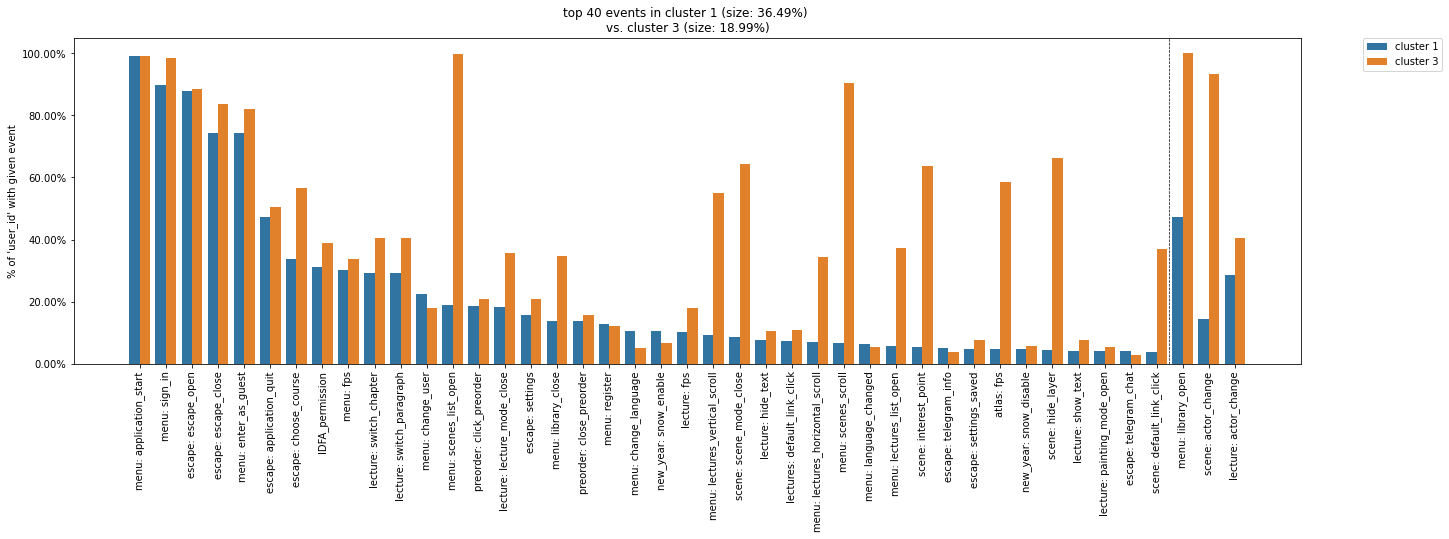

In [22]:
df.rete.cluster_event_dist(1, 3, top_n=40,
                             weight_col='user_id',
                             targets=['menu: library_open','scene: actor_change','lecture: actor_change'])

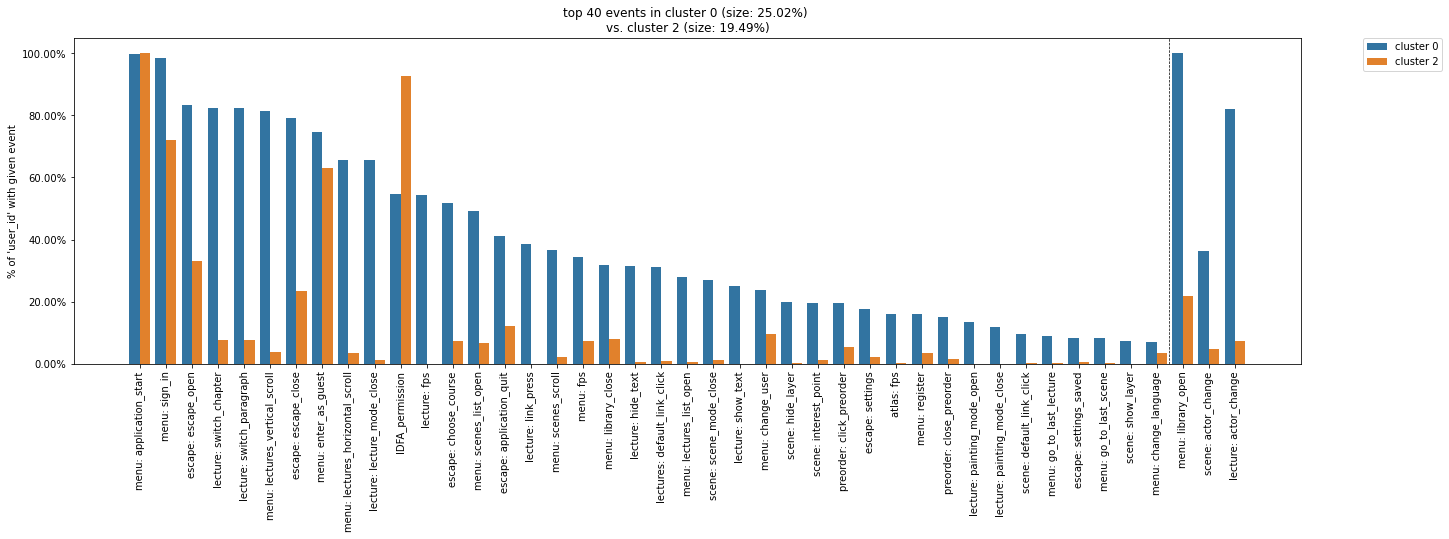

In [23]:
df.rete.cluster_event_dist(0, 2, top_n=40,
                             weight_col='user_id',
                             targets=['menu: library_open','scene: actor_change','lecture: actor_change'])

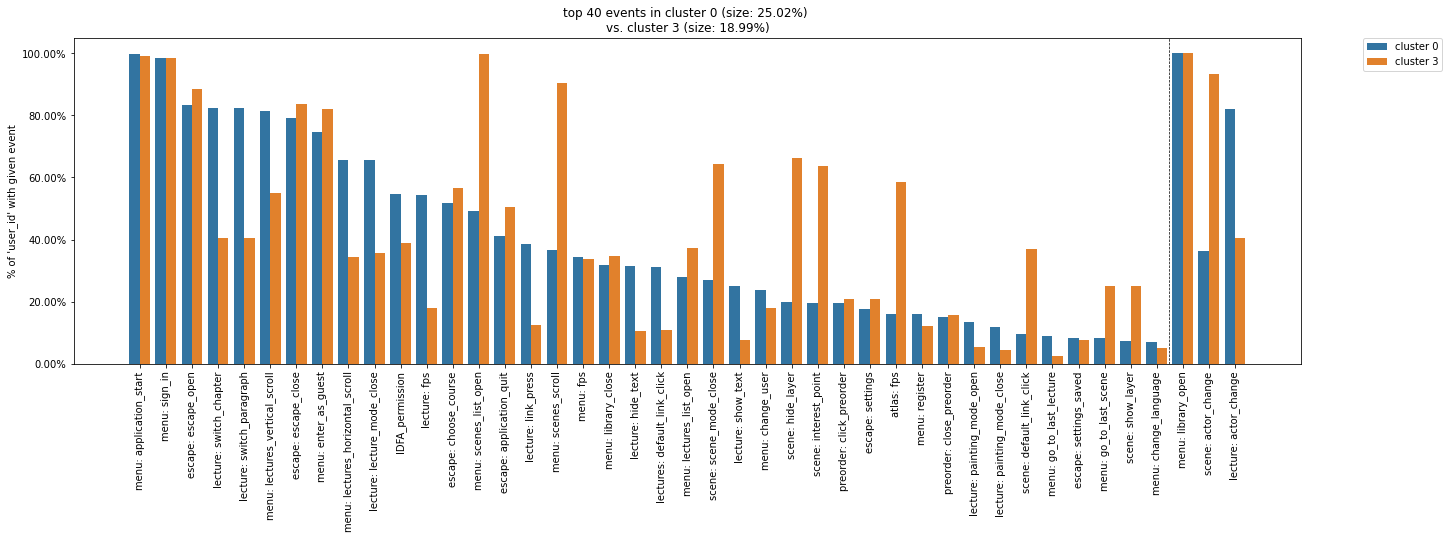

In [24]:
df.rete.cluster_event_dist(0, 3, top_n=40,
                             weight_col='user_id',
                             targets=['menu: library_open','scene: actor_change','lecture: actor_change'])

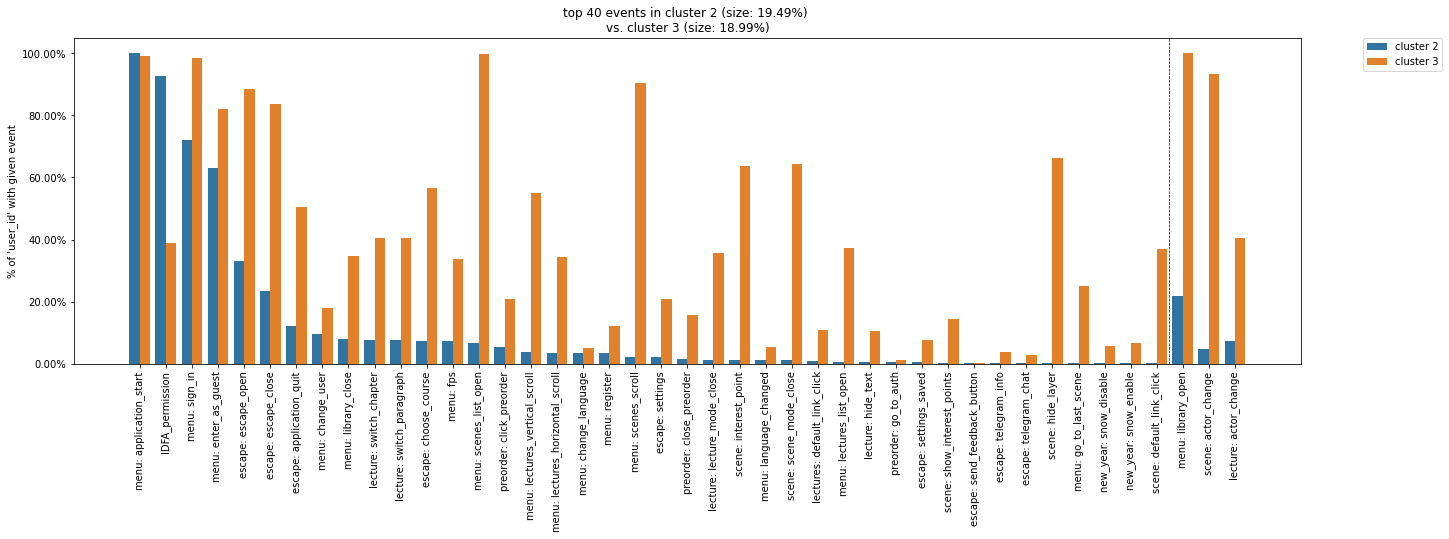

In [25]:
df.rete.cluster_event_dist(2, 3, top_n=40,
                             weight_col='user_id',
                             targets=['menu: library_open','scene: actor_change','lecture: actor_change'])

## Распределение по платформам в кластерах:

In [26]:


platforms = {}
for i, clus in enumerate(clusters):
    clus_platforms = []
    for user in set(clus.user_id):
        df_user = data[data.user_id==user]
        user_platforms = list(set(df_user.platform))
        for p in user_platforms:
            clus_platforms.append(p)
            
    platforms[i] = clus_platforms

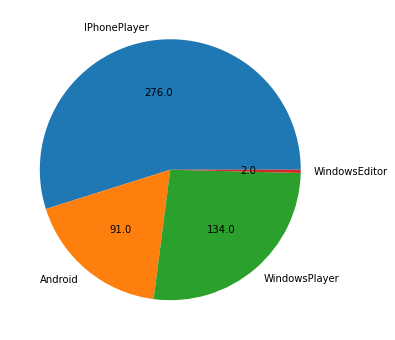

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

cluster_0_platforms = Counter(platforms[0])

def absolute_value(val): # функция для отображения значений users_in_clusters на pie chart
    a  = np.round(val/100.*sum(cluster_0_platforms.values()), 2)
    return a

plt.pie(cluster_0_platforms.values(), labels = cluster_0_platforms.keys(), autopct=absolute_value)

plt.show() 

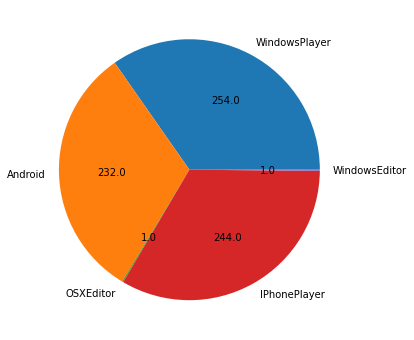

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

cluster_1_platforms = Counter(platforms[1])

def absolute_value(val): # функция для отображения значений users_in_clusters на pie chart
    a  = np.round(val/100.*sum(cluster_1_platforms.values()), 2)
    return a

plt.pie(cluster_1_platforms.values(), labels = cluster_1_platforms.keys(), autopct=absolute_value)

plt.show() 

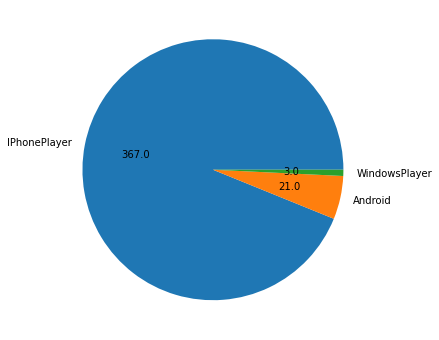

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

cluster_2_platforms = Counter(platforms[2])

def absolute_value(val): # функция для отображения значений users_in_clusters на pie chart
    a  = np.round(val/100.*sum(cluster_2_platforms.values()), 2)
    return a

plt.pie(cluster_2_platforms.values(), labels = cluster_2_platforms.keys(), autopct=absolute_value)

plt.show() 

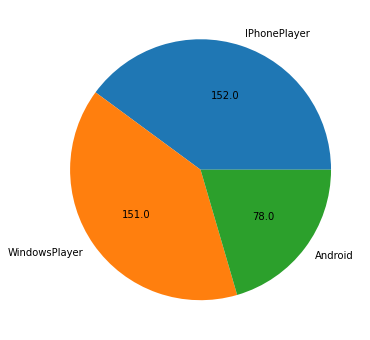

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

cluster_3_platforms = Counter(platforms[3])

def absolute_value(val): # функция для отображения значений users_in_clusters на pie chart
    a  = np.round(val/100.*sum(cluster_3_platforms.values()), 2)
    return a

plt.pie(cluster_3_platforms.values(), labels = cluster_3_platforms.keys(), autopct=absolute_value)

plt.show() 

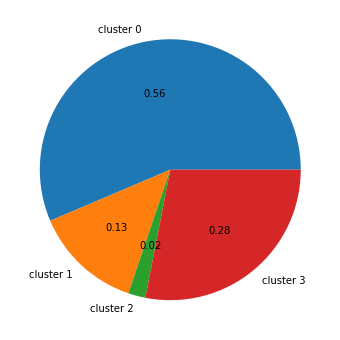

In [31]:
platforms_in_clus_0 = [len(clus_0)/len(df), len(clus_1)/len(df), len(clus_2)/len(df), len(clus_3)/len(df)]
labels = ["cluster 0", "cluster 1", "cluster 2", "cluster 3"]

import matplotlib.pyplot as plt
import numpy as np

def absolute_value(val): # функция для отображения значений users_in_clusters на pie chart
    a  = np.round(val/100.*sum(events_in_clusters), 2)
    return a

plt.pie(events_in_clusters, labels = labels, autopct=absolute_value)

plt.show() 

In [32]:
df.rete.get_adjacency(weight_col='user_id', norm_type=None)

,IDFA_permission,escape: application_quit,escape: escape_open,lecture: actor_change,menu: application_start,menu: change_language,menu: change_user,menu: enter_as_guest,menu: lectures_horizontal_scroll,menu: library_open,...,lectures: default_link_click,menu: go_to_last_lecture,menu: reset_password,menu: start-update-downloading,escape: feedback_send,menu: update_dont_install,menu: update_failed,preorder: place_preorder_success,menu: update_canceled,new_year: dialog_go_to_auth
IDFA_permission,14.0,13.0,11.0,1.0,335.0,29.0,130.0,303.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
escape: application_quit,17.0,3.0,9.0,0.0,172.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
escape: escape_open,15.0,575.0,19.0,9.0,53.0,0.0,1.0,4.0,0.0,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
lecture: actor_change,6.0,18.0,245.0,64.0,25.0,0.0,0.0,0.0,2.0,217.0,...,97.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
menu: application_start,826.0,13.0,109.0,0.0,61.0,57.0,198.0,360.0,0.0,10.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
menu: update_dont_install,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
menu: update_failed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
preorder: place_preorder_success,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
menu: update_canceled,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [33]:
df.rete.get_adjacency(weight_col='user_id', norm_type=None).to_excel('matrix.xlsx')

In [34]:
from matplotlib import pyplot as plt

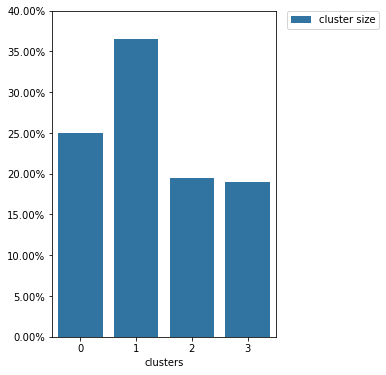

In [35]:
df.rete.get_clusters(method='kmeans',
                       feature_type='tfidf',
                       n_clusters=4,
                       ngram_range=(1,2),
                       plot_type='cluster_bar');

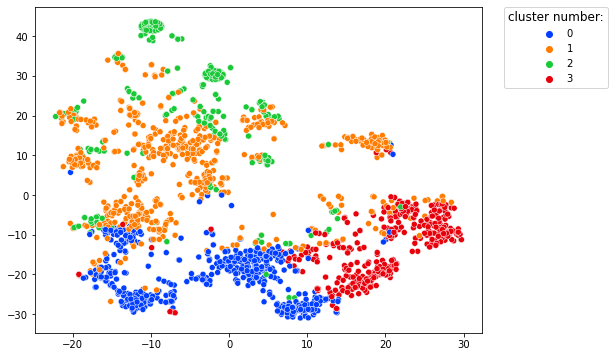

In [36]:
project(self=df.rete, plot_type ='clusters',
                  method='tsne',
                  perplexity=64);

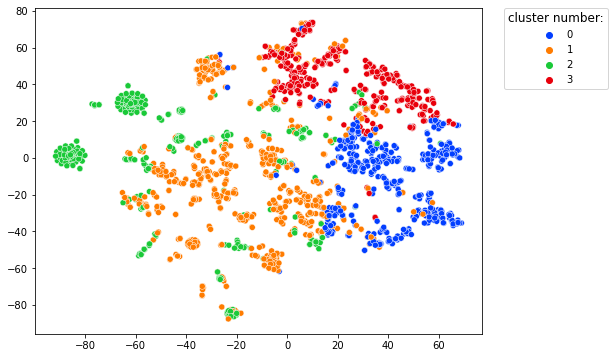

In [37]:
project(self=df.rete, plot_type ='clusters',
                  method='tsne',
                  perplexity=10);

In [38]:
len(clus_0),len(clus_1),len(clus_2),len(clus_3)

(67787, 16097, 2577, 33726)

## делим 0 кластер на 4 подкластера

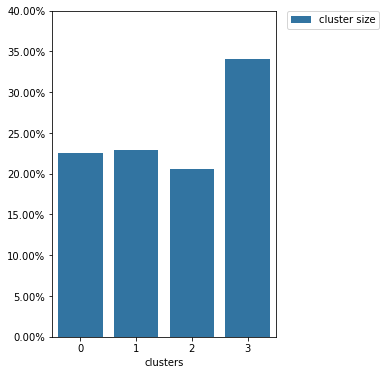

In [39]:
clus_0.rete.get_clusters(method='kmeans',
                       feature_type='tfidf',
                       n_clusters=4,
                       ngram_range=(1,2),
                       plot_type='cluster_bar');

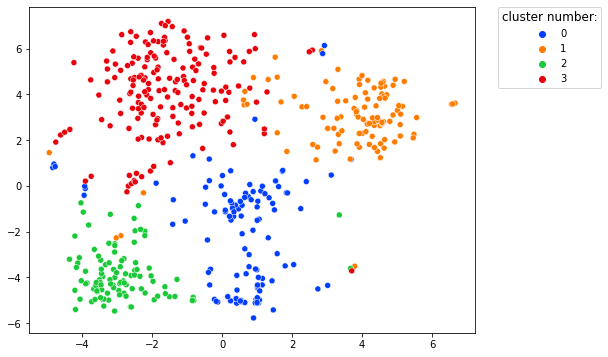

In [40]:
project(self=clus_0.rete, plot_type ='clusters',
                  method='tsne',
                  perplexity=128);

## делим 0 кластер на 4 подкластера

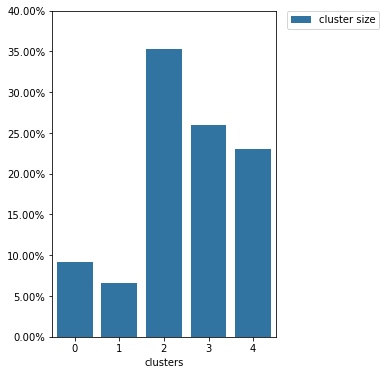

In [41]:
clus_1.rete.get_clusters(method='kmeans',
                       feature_type='tfidf',
                       n_clusters=5,
                       ngram_range=(1,2),
                       plot_type='cluster_bar');

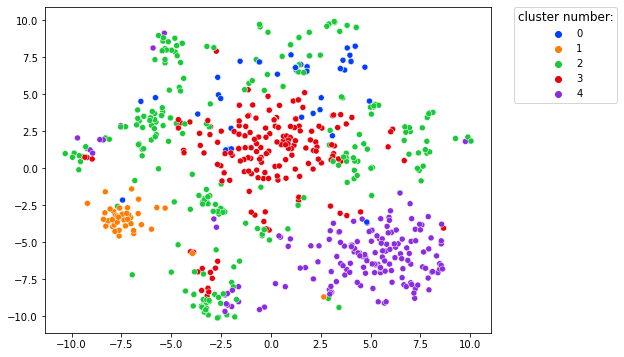

In [42]:
project(self=clus_1.rete, plot_type ='clusters',
                  method='tsne',
                  perplexity=128);